# Data Preprocessing


##### Downloading dataset


In [2]:
import opendatasets as od
import pandas as pd

od.download(
    'https://www.kaggle.com/datasets/shariful07/student-mental-health/data')

dataset = pd.read_csv("student-mental-health\\Student Mental health.csv")
dataset.head()

Skipping, found downloaded files in ".\student-mental-health" (use force=True to force download)


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,08/07/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,08/07/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08/07/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,08/07/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,08/07/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
# Dropping timestamp column
dataset = dataset.drop("Timestamp", axis=1)

In [4]:
# Processing gender column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Filling empty cells with value "Female"
dataset['Choose your gender'].fillna('Female', inplace=True)
dataset['Choose your gender'] = label_encoder.fit_transform(
    dataset['Choose your gender'])

In [5]:
# Processing age column
mean_age = dataset['Age'].mean()
dataset['Age'].fillna(mean_age, inplace=True)
# Round the mean value to the nearest integer (optional)
mean_age = round(mean_age)
# Convert the 'Age' column to integers
dataset['Age'] = dataset['Age'].astype(int)

In [6]:
# Processing course column

import openai
import time

# Set your OpenAI GPT-3 API key
openai.api_key = ''


def categorize_course_with_gpt3(course):
    # Construct a prompt for GPT-3 to perform a web search
    prompt = f"Select the field of this course {course} from these given fields. Do not reply anything else than the given feilds. Reply only the strings of field:\n" \
             "Arts and Humanities\n" \
             "Social Sciences\n" \
             "Natural Sciences\n" \
             "Engineering and Technology\n" \
             "Health Sciences\n" \
             "Business and Economics\n" \
             "Law\n" \
             "Religious Studies\n" \
             "Agriculture and Environmental Studies\n" \
             "Interdisciplinary Studies\n" \
             "Communication and Media\n" \
             "Computer and Information Sciences\n" \
             "Physical Education and Sports Sciences\n" \
             "Mathematics and Statistics\n" \
             "Public Policy and Administration\n" \
             "Interdisciplinary and General Education\n"

    # Make an API call to GPT-3 using the chat completion endpoint
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=150  # Adjust as needed
    )
    return response["choices"][0]["message"]["content"]


# Set the rate limit variables
requests_limit = 3
wait_time = 60

# Iterate over the DataFrame and update values
for index, row in dataset.iterrows():
    current_value = row['What is your course?']
    if pd.notna(current_value):
        updated_value = categorize_course_with_gpt3(current_value)
        dataset.at[index, 'What is your course?'] = updated_value
        print(updated_value)
    else:
        dataset.at[index, 'What is your course?'] = "General Studies"
        print("General Studies")

    # Check if 3 requests have been made and introduce a wait
    if (index + 1) % requests_limit == 0 and index != 0:
        print(f"Waiting for {wait_time} seconds...")
        time.sleep(wait_time)

Engineering and Technology
Religious Studies
Computer and Information Sciences
Waiting for 60 seconds...
Law
Mathematics and Statistics
Engineering and Technology
Waiting for 60 seconds...
Religious Studies
Computer and Information Sciences
Business and Economics
Waiting for 60 seconds...
Interdisciplinary Studies
Social Sciences
Engineering and Technology
Waiting for 60 seconds...
Computer and Information Sciences
Engineering and Technology
Engineering and Technology
Waiting for 60 seconds...
Computer and Information Sciences
Business and Economics
Engineering and Technology
Waiting for 60 seconds...
Computer and Information Sciences
Agriculture and Environmental Studies
Engineering and Technology
Waiting for 60 seconds...
Engineering and Technology
Computer and Information Sciences
Engineering and Technology
Waiting for 60 seconds...
Computer and Information Sciences
Business and Economics
Engineering and Technology
Waiting for 60 seconds...
Engineering and Technology
Computer and In

In [15]:
# Processing course column -- continue

dataset['What is your course?'] = label_encoder.fit_transform(
    dataset['What is your course?'])

In [59]:
# Processing Your current year of Study column

label_mapping_year = {
    "year 1": 0,
    "year 2": 1,
    "year 3": 2,
    "year 4": 3
}

# Clean up column values by converting to lowercase and removing leading and trailing spaces
dataset['Your current year of Study'] = dataset['Your current year of Study'].str.lower().str.strip()

# Apply label encoding using a for loop with a check for matching characters
dataset['Your current year of Study'] = [next((label_mapping_year[label] for label in label_mapping_year if all(char in year for char in label)), None) for year in dataset['Your current year of Study']]


In [ ]:
# Processing course CGPA column

label_mapping = {
    "0-1.99": 0,
    "2.00-2.49": 1,
    "2.50-2.99": 2,
    "3.00-3.49": 3,
    "3.5-4.00": 4
}

# Clean up column values by removing leading and trailing spaces
dataset['What is your CGPA?'] = dataset['What is your CGPA?'].str.strip()

# Apply label encoding using a for loop with a check for matching characters
dataset['What is your CGPA?'] = [next((label_mapping[label] for label in label_mapping if all(
    char in cgpa for char in label)), None) for cgpa in dataset['What is your CGPA?']]

In [44]:
# Processing martial status column

dataset['Marital status'] = label_encoder.fit_transform(
    dataset['Marital status'])

In [46]:
# Processing Do you have Depression? column

dataset['Do you have Depression?'] = label_encoder.fit_transform(
    dataset['Do you have Depression?'])

In [48]:
# Processing Do you have Anxiety? column

dataset['Do you have Anxiety?'] = label_encoder.fit_transform(
    dataset['Do you have Anxiety?'])

In [50]:
# Processing Do you have Panic attack? column

dataset['Do you have Panic attack?'] = label_encoder.fit_transform(
    dataset['Do you have Panic attack?'])

In [52]:
# Processing Did you seek any specialist for a treatment? column

dataset['Did you seek any specialist for a treatment?'] = label_encoder.fit_transform(
    dataset['Did you seek any specialist for a treatment?'])

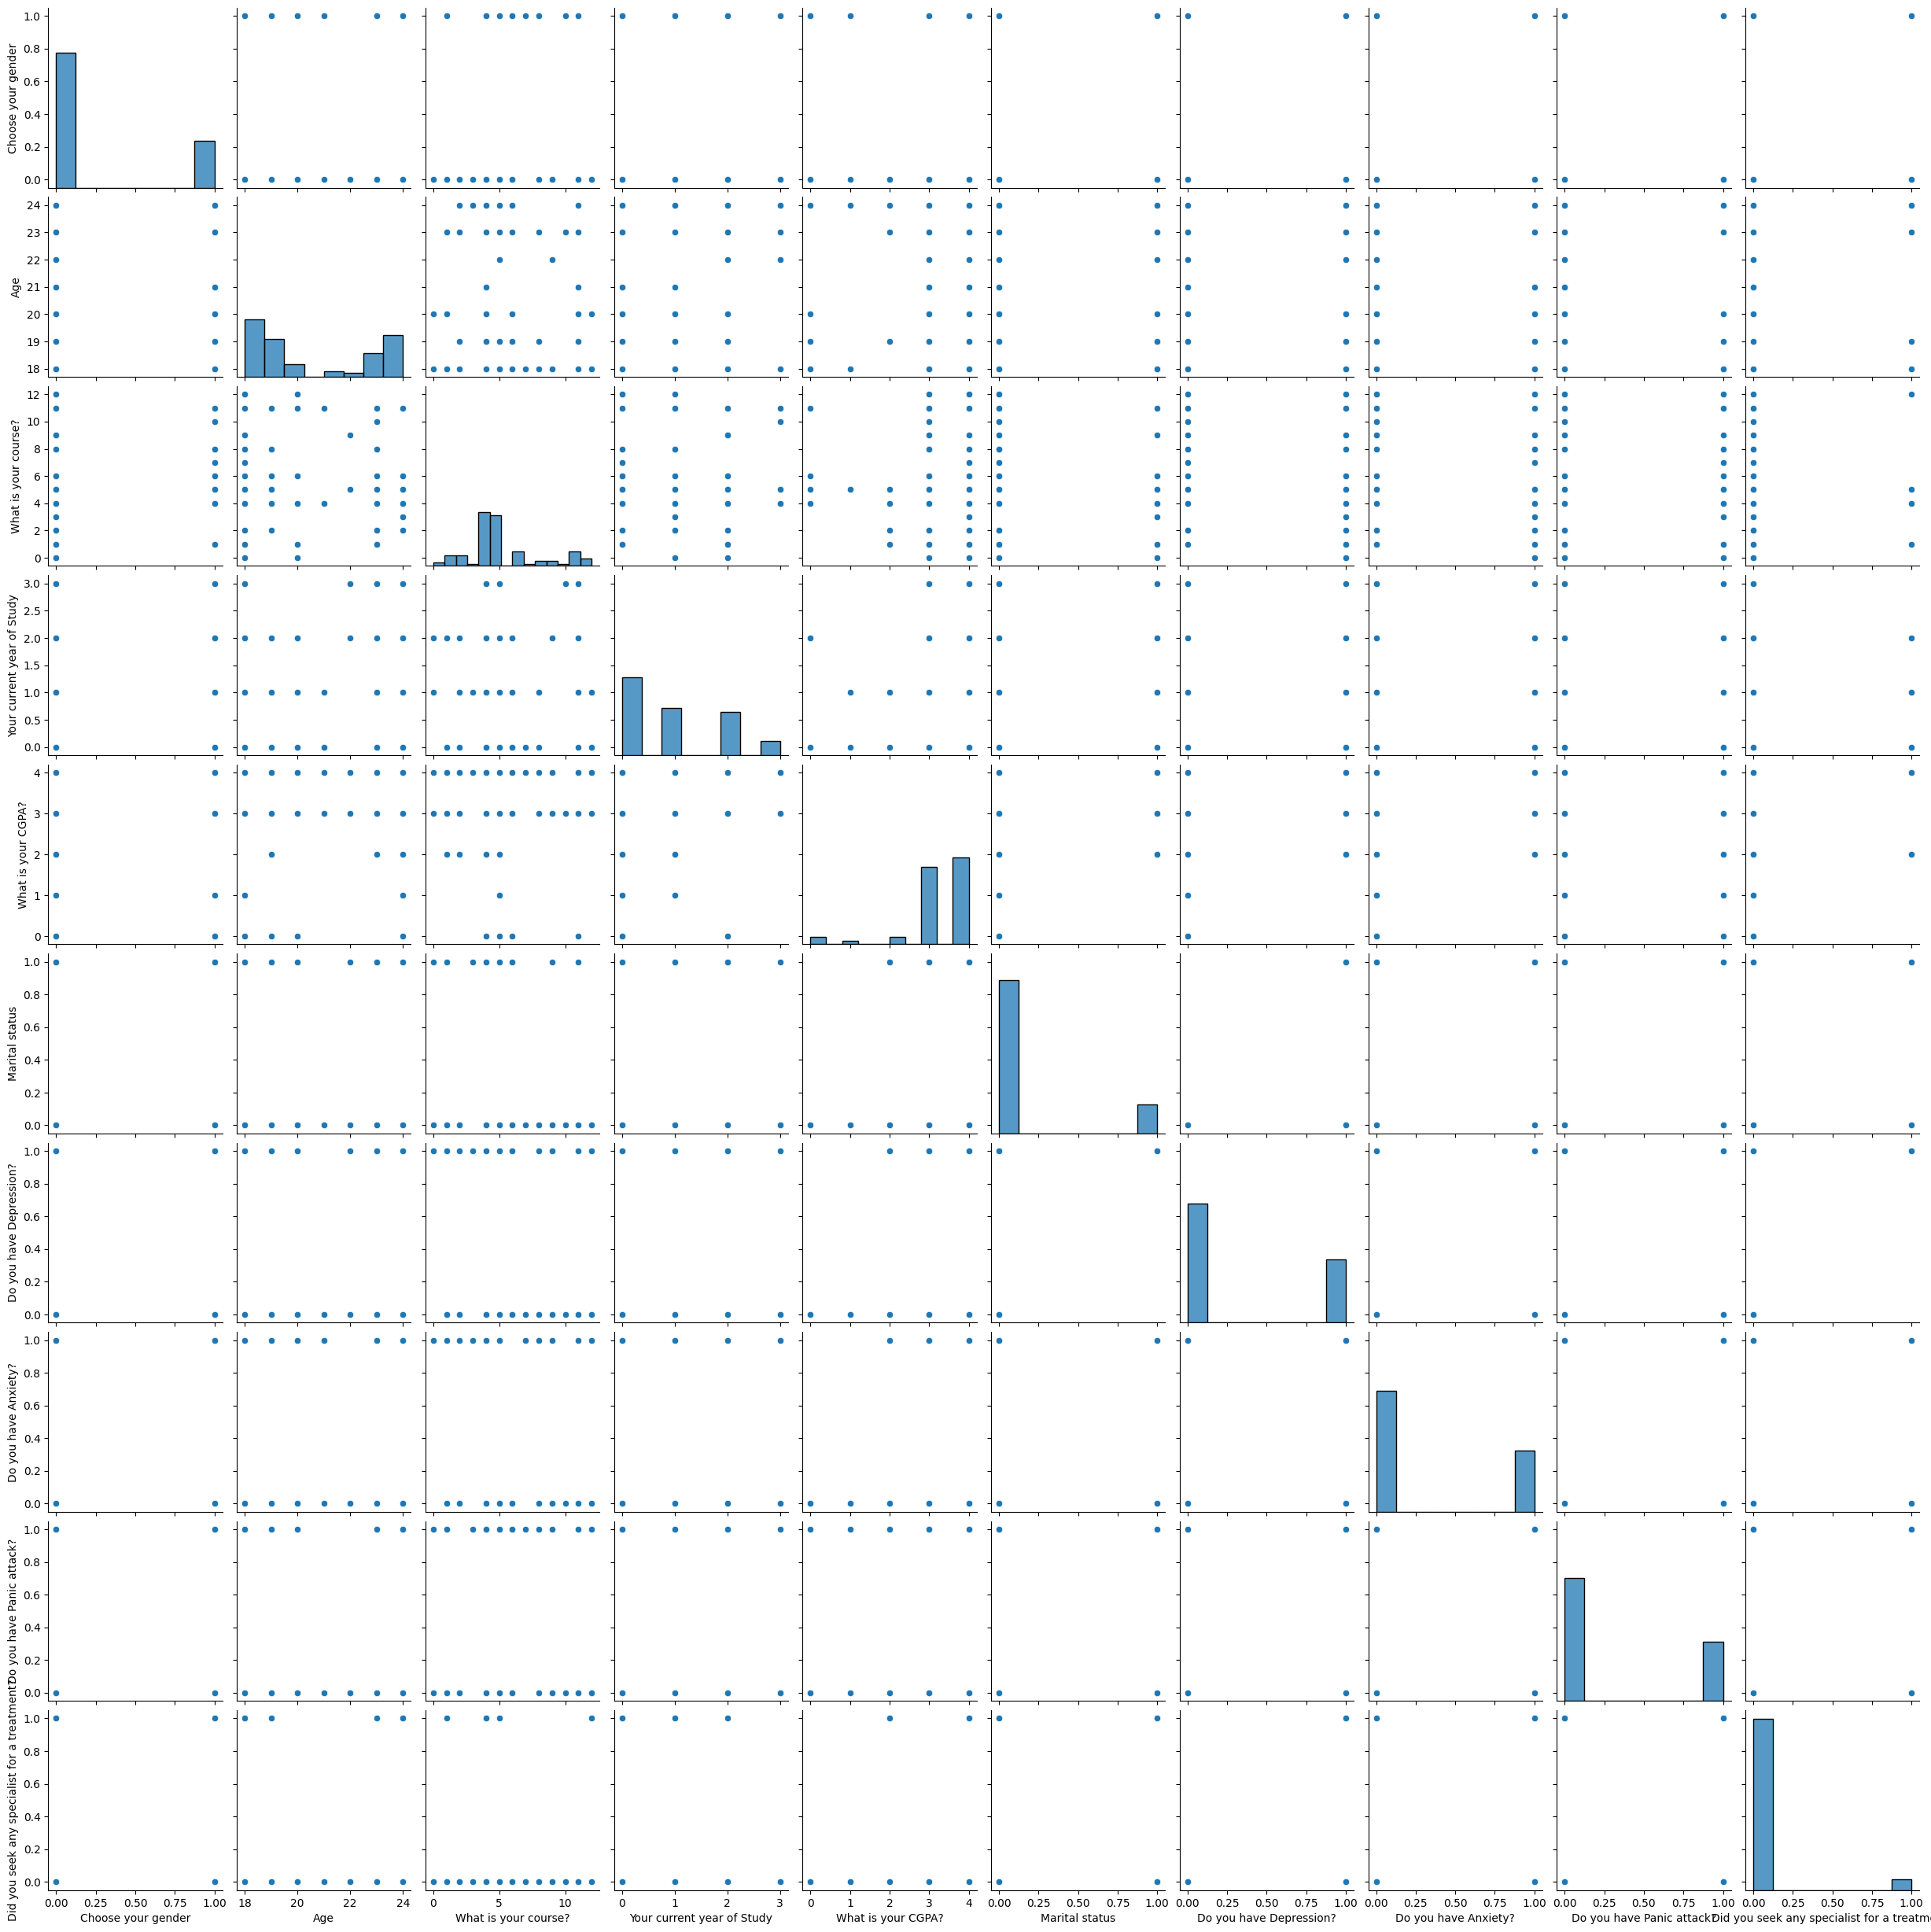

In [4]:
import seaborn as sns
import pandas as pd

dataset = pd.read_csv("new_file.csv")
sns.pairplot(dataset)

In [28]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

dataset.sort_values(by= "What is your CGPA?" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(dataset, x="What is your CGPA?", y="Choose your gender", orientation='h',color='Do you have Depression?')
fig.show()

<Figure size 1280x960 with 0 Axes>

In [38]:
tempdataset = pd.read_csv("new_file.csv")

fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

x1 = [18,19,20,21,22,23,24]

fig.append_trace(go.Bar(
    x=tempdataset["Do you have Depression?"],
    y=x1,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(20, 10, 56, 1.0)',
            width=0),
    ),
    name='Depression across the ages',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=tempdataset["Do you have Panic attack?"], y=x1,
    mode='lines+markers',
    line_color='rgb(40, 0, 128)',
    name='Panic Attacks',
), 1, 2)

fig.update_layout(
    title='Major depression and Panic Attacks',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=5,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.45],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=10000,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []


# Adding labels
for ydn, yd, xd in zip(tempdataset["Do you have Panic attack?"], tempdataset["Do you have Depression?"], x1):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn+10,
                            text='{:,}'.format(ydn) + '%',
                            font=dict(family='Arial', size=10,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd+10 ,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=10,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper',
                        x=-0.2, y=-0.109,
                        text="Mental health visualization",
                        font=dict(family='Arial', size=20, color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

In [ ]:
x = ["Appetite change", "Average across symptoms", "Depressed mood", "Difficulty concentrating", "Loss of interest",
    "Low energy", "Low self-esteem", "Psychomotor agitation", "Psychomotor agitation", "Sleep problems", "Suicidal ideation"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=x, y=df3["Nearly every day"], name='Nearly every day',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=x, y=df3["More than half the days"], name = 'More than half the days',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=x, y=df3["Several days"], name='Several days',
                         line=dict(color='black', width=4,
                              dash='dashdot') # dash options include 'dash', 'dot', and 'dashdot'
))

# Edit the layout
fig.update_layout(title='Depressive symptoms across us population',
                   xaxis_title='Entity',
                   yaxis_title='Types of days')


fig.show()

In [44]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Age', data = dataset[dataset['Do you have Depression?'] == 2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

ValueError: min() arg is an empty sequence

<Figure size 1500x700 with 0 Axes>

<Axes: >

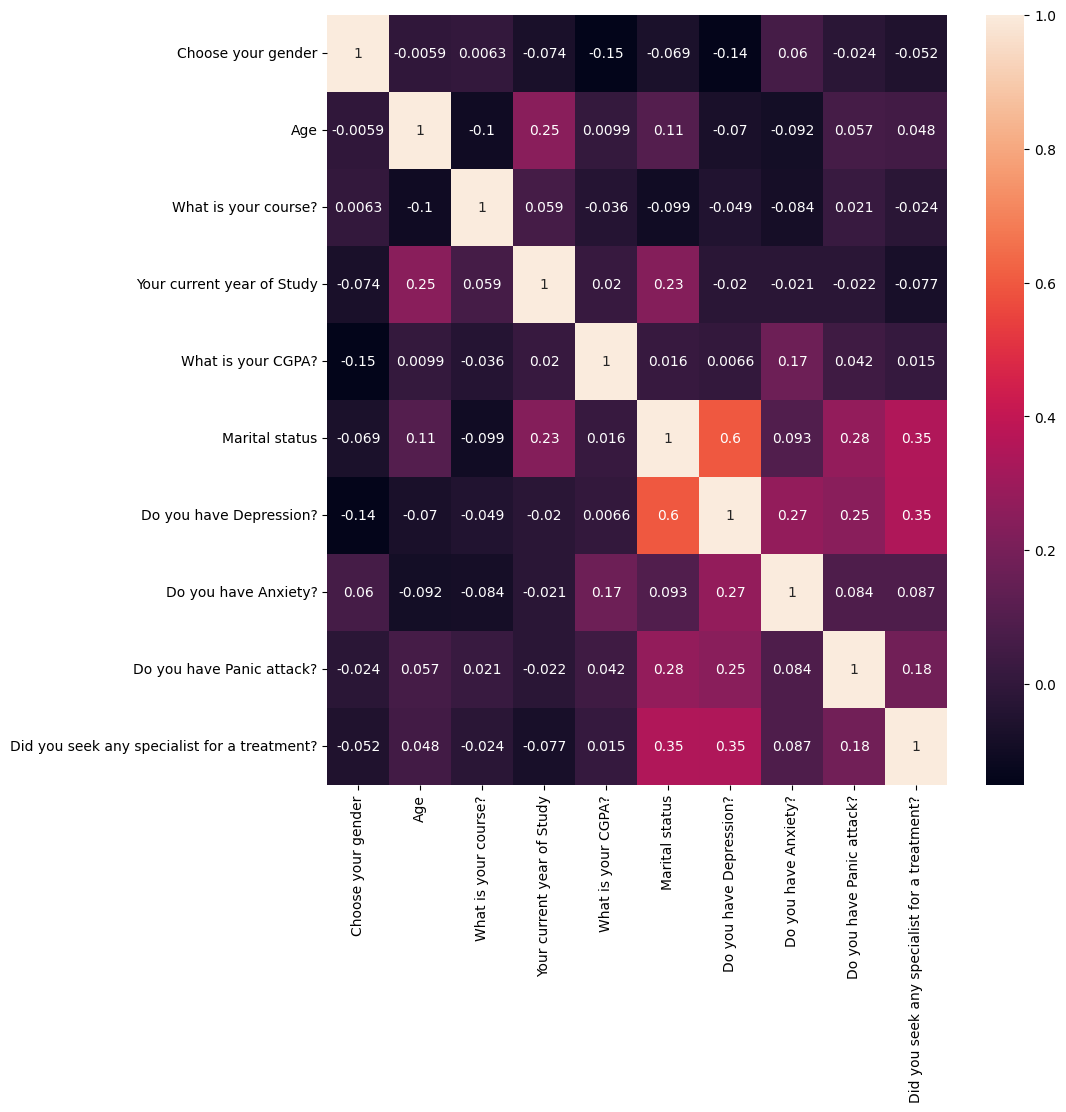

In [43]:
corrmat= dataset.corr()
plt.figure(figsize=(10,10))  
sns.heatmap(corrmat,annot=True, cmap=None)

In [41]:
#dataset.to_csv('new_file.csv', index=False)

tempdataset.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,0,18,5,0,3,0,1,0,1,0
1,0,24,6,0,3,0,0,0,0,0
2,0,19,4,0,4,0,0,0,0,0
3,0,24,4,3,3,0,0,1,0,0
4,0,18,5,0,4,0,1,0,0,0
